# Data Preprocessing

more later

In [59]:
%pwd
# git clone https://github.com/solimantwali/APS360MusicGenreClassifier.git
%cd /content/drive/MyDrive/APS360 Project/Data Processing
%ls

%cd /content/APS360MusicGenreClassifier
%ls

!git add /content/drive/MyDrive/APS360 Project/Data Processing
!git status

/content/drive/.shortcut-targets-by-id/1ee6VlkWanu_sWVbkW6MTr9D_Qr95-wxl/APS360 Project/Data Processing
DataProcessing.ipynb
/content/APS360MusicGenreClassifier
README.md
fatal: /content/drive/MyDrive/APS360: '/content/drive/MyDrive/APS360' is outside repository
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/MyDrive/APS360 Project/musdb18"

Mounted at /content/drive
README.md  test  train


In [ ]:
# install stempeg dependency for manipulating stem files

# !pip install stempeg - only need to run once
import stempeg
import IPython.display as ipd
from IPython.core.display import display
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os, os.path
import shutil


In [ ]:
# only need to run this once
# moving every other file from train to valid folder to create validation set

source_dir = "/content/drive/MyDrive/APS360 Project/musdb18/test"
target_dir = "/content/drive/MyDrive/APS360 Project/musdb18/valid"
    
file_names = os.listdir(source_dir)
    
for i in range(len(file_names)):
  if i%2==0: shutil.move(os.path.join(source_dir, file_names[i]), target_dir)

In [ ]:
dir = "/content/drive/MyDrive/APS360 Project/musdb18/"

words = ['train', 'valid', 'test']
for word in words:
  APP_FOLDER = dir+word
  totalFiles = 0
  totalDir = 0
  for base, dirs, files in os.walk(APP_FOLDER):
      # print('Searching in : ',base)
      for directories in dirs:
          totalDir += 1
      for Files in files:
          totalFiles += 1

  print(f'samples in {word} set: ',totalFiles)

samples in train set:  100
samples in valid set:  25
samples in test set:  25


(5, 132300, 2)


(1025, 259)
(1025, 259)
(1025, 259)
(1025, 259)


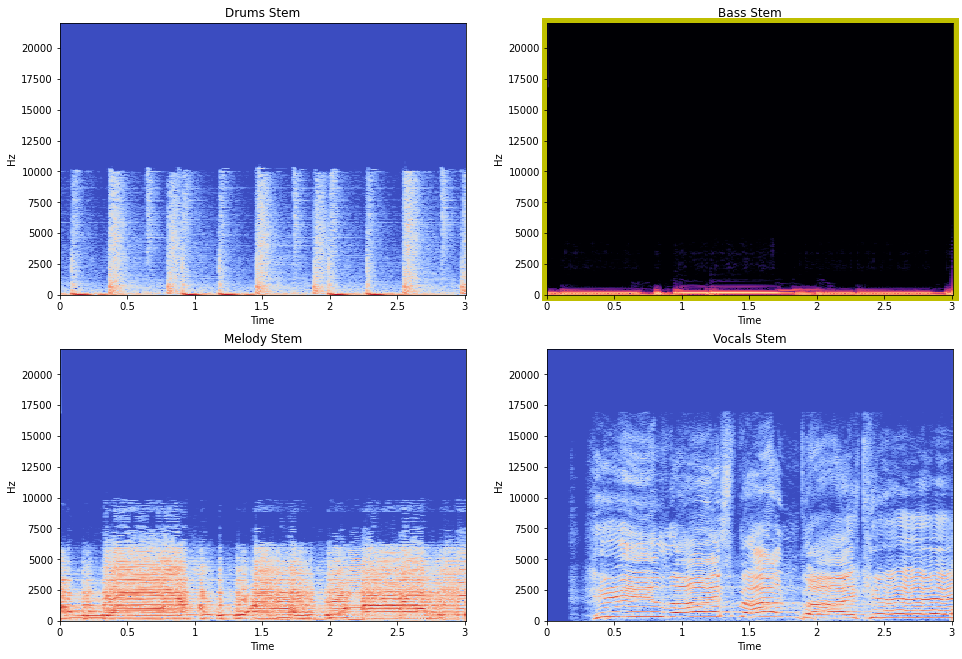

In [ ]:
# S, rate = stempeg.read_stems(stempeg.example_stem_path())

# print(stempeg.example_stem_path())

song_path = "/content/drive/MyDrive/APS360 Project/musdb18/train/Music Delta - Hendrix.stem.mp4"

S, rate = stempeg.read_stems(song_path, start=0, duration=3)

print(S.shape)

# s_slice = S[0,:,0]
# print(s_slice.shape)
# k = ipd.Audio(s_slice, rate=44100, autoplay=True)
# #k

# s_slice2 = S[1,:,0]
# p = ipd.Audio(s_slice2, rate=44100, autoplay=True)
# #p

def add_subplot_border(ax, width=1, color=None ):

    fig = ax.get_figure()

    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)

def display_stems(S, rate, hi_stem):
  all_stems = []

  for i in range(4):
    stem = librosa.stft(S[i+1, :, 0])
    print(stem.shape)
    stem_db = librosa.amplitude_to_db(abs(stem))
    # print('shape of plotted data:', stem_db.shape)
    all_stems.append(stem_db)

  fig, axs = plt.subplots(2, 2, figsize=(16,11))
  
  librosa.display.specshow(all_stems[0], sr=rate, x_axis='time', y_axis='hz', ax = axs[0,0])
  librosa.display.specshow(all_stems[1], sr=rate, x_axis='time', y_axis='hz', ax = axs[0,1])
  librosa.display.specshow(all_stems[2], sr=rate, x_axis='time', y_axis='hz', ax = axs[1,0])
  librosa.display.specshow(all_stems[3], sr=rate, x_axis='time', y_axis='hz', ax = axs[1,1])
  axs[0, 0].set_title('Drums Stem')
  axs[0, 1].set_title('Bass Stem')
  axs[1, 0].set_title('Melody Stem')
  axs[1, 1].set_title('Vocals Stem')

  ax = axs.reshape(-1)
  #print(ax[1])
  if hi_stem != 0:
    add_subplot_border(ax[hi_stem-1], width=5, color='y')

def audio_and_spec(S, rate, stem):
  S_slice = S[stem, :, 0]
  display(ipd.Audio(S_slice, rate=rate, autoplay=True))
  display_stems(S, rate, stem)
  
audio_and_spec(S, rate, 2)
#display_stems(S, rate, 1)


In [ ]:
song_path = "/content/drive/MyDrive/APS360 Project/musdb18/train/Music Delta - Hendrix.stem.mp4"

S, rate = stempeg.read_stems(song_path, start=0, duration=3)


a_slice = S[0, :, 0]
print(a_slice.shape)
print(rate)

display(ipd.Audio(a_slice, rate=rate, autoplay=True))

(132300,)
44100
